In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA

# Figures inline and set visualization style
%matplotlib inline
sns.set()

In [2]:
kobe_df = pd.read_csv("data.csv")

Predictor/label: shot_made_flag (this is what you are predicting)

In [3]:
kobe_df.head(10)

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5
5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,6
6,Layup Shot,Layup,251,20000012,34.0443,0,0,-118.2698,8,3,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,7
7,Jump Shot,Jump Shot,254,20000012,34.0163,1,28,-118.2688,8,3,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,8
8,Jump Shot,Jump Shot,265,20000012,33.9363,-65,108,-118.3348,6,3,...,2PT Field Goal,Left Side(L),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,9
9,Running Jump Shot,Jump Shot,294,20000012,33.9193,-33,125,-118.3028,3,3,...,2PT Field Goal,Center(C),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,10


In [4]:
kobe_df.shape

(30697, 25)

In [5]:
kobe_df.describe()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
count,30697.000000,3.069700e+04,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,25697.000000,3.069700e+04,30697.000000
mean,249.190800,2.476407e+07,33.953192,7.110499,91.107535,-118.262690,4.885624,2.519432,0.146562,28.365085,13.437437,0.446161,1.610613e+09,15349.000000
std,150.003712,7.755175e+06,0.087791,110.124578,87.791361,0.110125,3.449897,1.153665,0.353674,17.478949,9.374189,0.497103,0.000000e+00,8861.604943
min,2.000000,2.000001e+07,33.253300,-250.000000,-44.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,1.000000
25%,110.000000,2.050008e+07,33.884300,-68.000000,4.000000,-118.337800,2.000000,1.000000,0.000000,13.000000,5.000000,0.000000,1.610613e+09,7675.000000
50%,253.000000,2.090035e+07,33.970300,0.000000,74.000000,-118.269800,5.000000,3.000000,0.000000,28.000000,15.000000,0.000000,1.610613e+09,15349.000000
75%,368.000000,2.960047e+07,34.040300,95.000000,160.000000,-118.174800,8.000000,3.000000,0.000000,43.000000,21.000000,1.000000,1.610613e+09,23023.000000
max,659.000000,4.990009e+07,34.088300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.000000,1.610613e+09,30697.000000


In [6]:
kobe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
action_type           30697 non-null object
combined_shot_type    30697 non-null object
game_event_id         30697 non-null int64
game_id               30697 non-null int64
lat                   30697 non-null float64
loc_x                 30697 non-null int64
loc_y                 30697 non-null int64
lon                   30697 non-null float64
minutes_remaining     30697 non-null int64
period                30697 non-null int64
playoffs              30697 non-null int64
season                30697 non-null object
seconds_remaining     30697 non-null int64
shot_distance         30697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             30697 non-null object
shot_zone_area        30697 non-null object
shot_zone_basic       30697 non-null object
shot_zone_range       30697 non-null object
team_id               30697 non-null int64
team_name         

In [7]:
# separate the training and testing set from the dataset
train_df = kobe_df[kobe_df["shot_made_flag"].notna()]
test_df = kobe_df[kobe_df["shot_made_flag"].isna()]

train_df.shape, test_df.shape

((25697, 25), (5000, 25))

# EDA

In [8]:
# No Missing data in the file
# Classification - made or miss

Text(0.5, 1.0, "Field Goal Miss/Made During Kobe's Career")

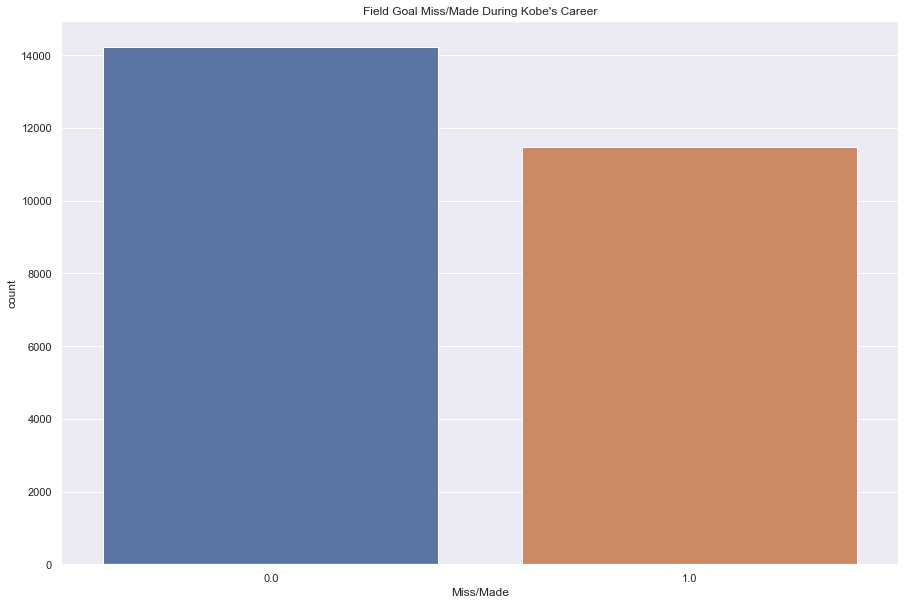

In [15]:
# plot the field goal that Kobe made or miss during his career (plot label)
plt.figure(figsize=(15, 10))
v1 = sns.countplot(x="shot_made_flag", data=train_df)
plt.xlabel("Miss/Made") # set x axis label
plt.title("Field Goal Miss/Made During Kobe's Career") # set title

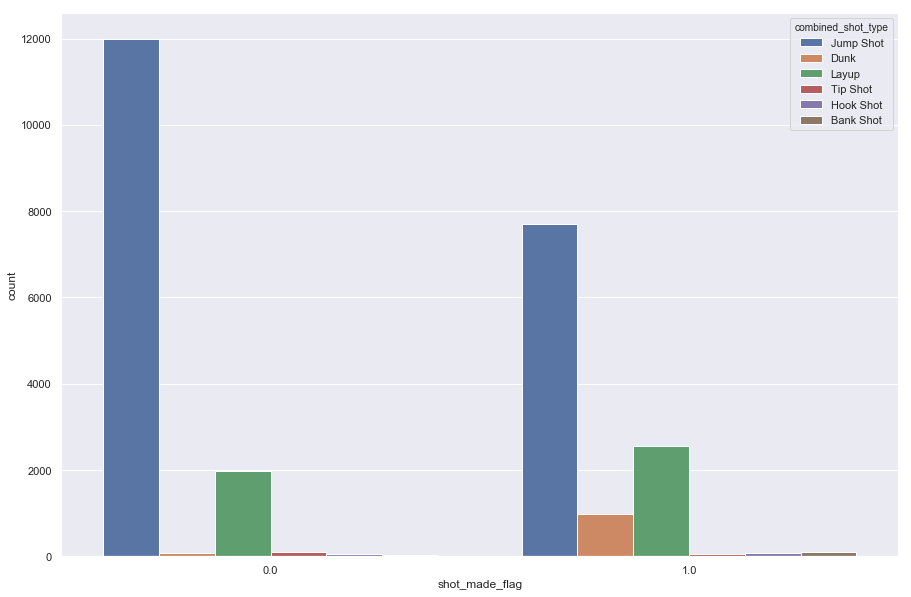

In [16]:
plt.figure(figsize=(15, 10))
v2 = sns.countplot(x="shot_made_flag",hue="combined_shot_type", data=train_df)
# Jumpshot dominated the shot type
# Can consider extract jump shot from the shot type to look at them differently

In [11]:
train_df["combined_shot_type"].value_counts()

Jump Shot    19710
Layup         4532
Dunk          1056
Tip Shot       152
Hook Shot      127
Bank Shot      120
Name: combined_shot_type, dtype: int64

In [12]:
jump_shot_train = train_df.loc[train_df["combined_shot_type"] == "Jump Shot"]
n_jump_shot_train = train_df.loc[train_df["combined_shot_type"] != "Jump Shot"]

Text(0.5, 1.0, "Jump Shot Miss/Made During Kobe's Career")

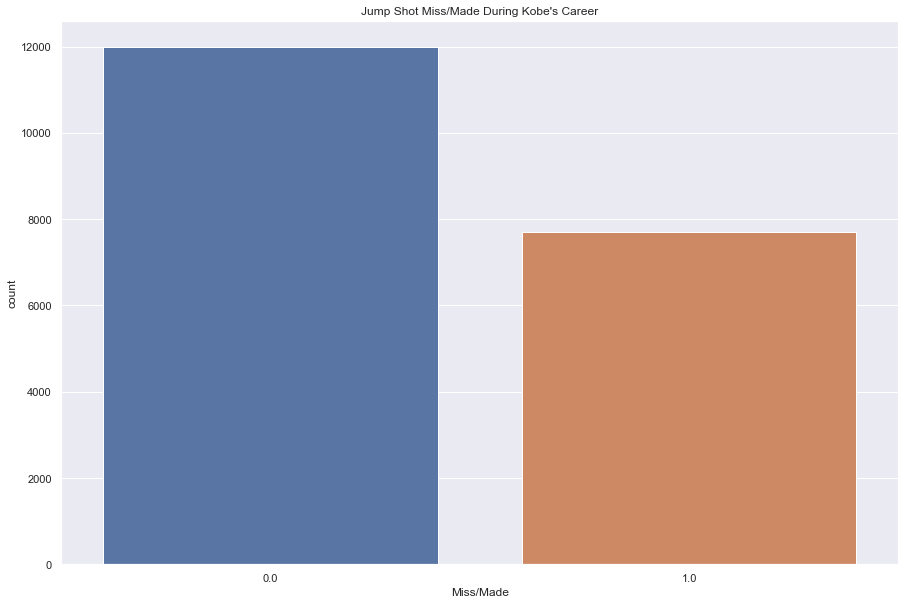

In [17]:
plt.figure(figsize=(15, 10))
v3 = sns.countplot(x="shot_made_flag", data=jump_shot_train)
plt.xlabel("Miss/Made") # set x axis label
plt.title("Jump Shot Miss/Made During Kobe's Career") # set title

Text(0.5, 1.0, "Non-Jump Shot Miss/Made During Kobe's Career")

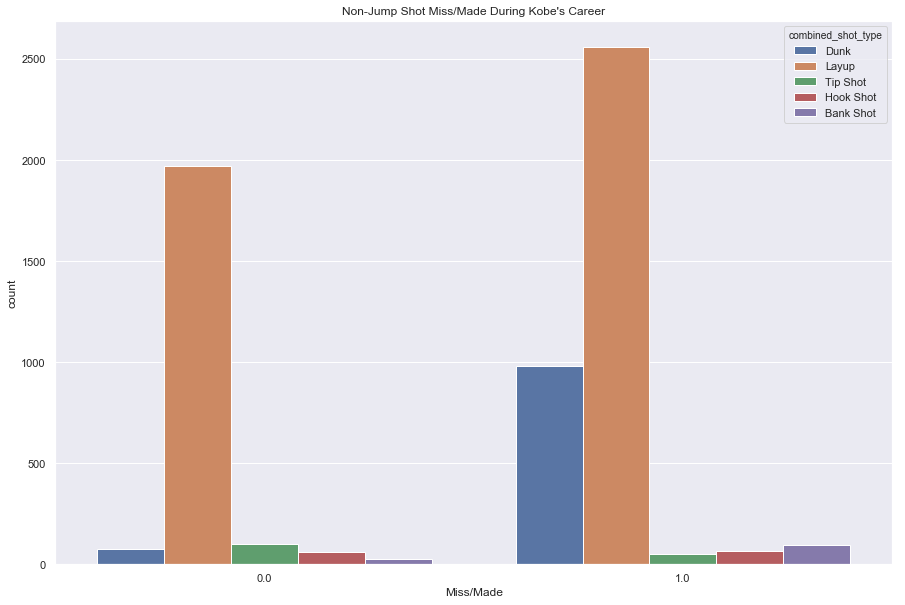

In [18]:
plt.figure(figsize=(15, 10))
v4 = sns.countplot(x="shot_made_flag",hue="combined_shot_type", data = n_jump_shot_train)
plt.xlabel("Miss/Made") # set x axis label
plt.title("Non-Jump Shot Miss/Made During Kobe's Career") # set title

Kobe missed roughly 60% of his jumpshots, while making the rest of the 40%. However, he made siginficantly more dunk/layup (which makes sense as these are shots that are closer to the baskets)

In [54]:
# Mean is the shooting percentage
# Count is the number of shot that Kobe took during his career
# Sum is the number of shot that Kobe made

shot_stat = train_df.groupby("combined_shot_type")["shot_made_flag"].agg(["mean","count","sum"]).sort_values(ascending=False, by="count").reset_index()
shot_stat # dataframe

,combined_shot_type,mean,count,sum
0,Jump Shot,0.391071,19710,7708.0
1,Layup,0.565093,4532,2561.0
2,Dunk,0.928030,1056,980.0
3,Tip Shot,0.348684,152,53.0
4,Hook Shot,0.535433,127,68.0
5,Bank Shot,0.791667,120,95.0


In [55]:
# Rename the Shot stat columns for easier understanding
shot_stat = shot_stat.rename(columns = {"mean": "Shooting Percentage", "count" : "Shot Taken", "sum": "Shot Made"})
shot_stat

,combined_shot_type,Shooting Percentage,Shot Taken,Shot Made
0,Jump Shot,0.391071,19710,7708.0
1,Layup,0.565093,4532,2561.0
2,Dunk,0.928030,1056,980.0
3,Tip Shot,0.348684,152,53.0
4,Hook Shot,0.535433,127,68.0
5,Bank Shot,0.791667,120,95.0


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

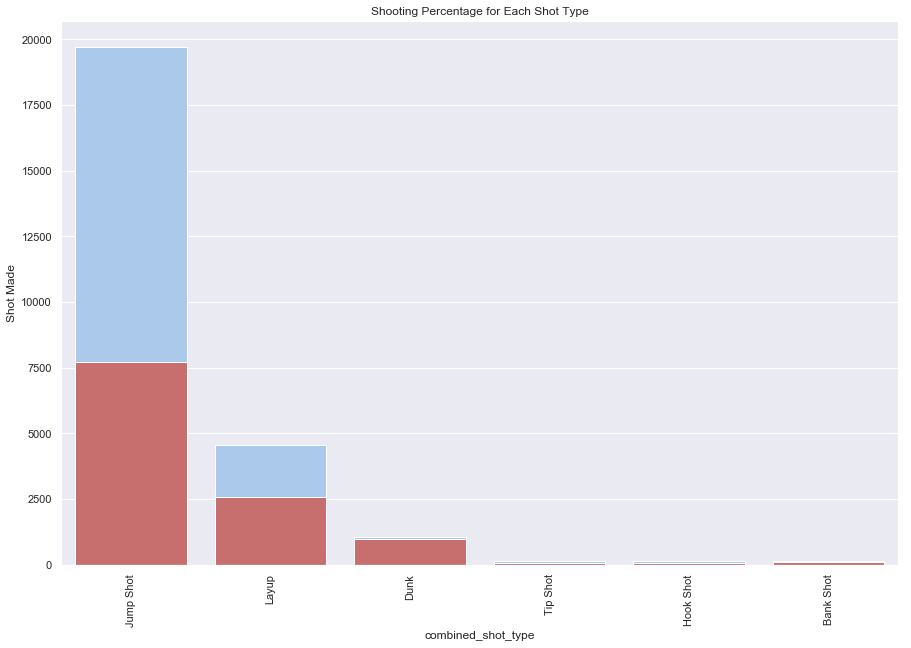

In [56]:
plt.figure(figsize=(15, 10))
plt.title("Shooting Percentage for Each Shot Type")

sns.set_color_codes("pastel")
sns.barplot(x="combined_shot_type", y="Shot Taken", data=shot_stat, order=shot_stat["combined_shot_type"], label="Total", color="b")

sns.set_color_codes("muted")
sns.barplot(x="combined_shot_type", y="Shot Made", data=shot_stat, order=shot_stat["combined_shot_type"],label="Mean", color="r")

plt.xticks(rotation=90)

In [79]:
# group by the shot number by shot range zone
zone_stat = train_df.groupby("shot_zone_range")["shot_made_flag"].agg(["mean","count","sum"]).sort_values(ascending=False, by="mean").reset_index()
zone_stat # dataframe

,shot_zone_range,mean,count,sum
0,Less Than 8 ft.,0.573120,7857,4503.0
1,8-16 ft.,0.435484,5580,2430.0
2,16-24 ft.,0.401766,6907,2775.0
3,24+ ft.,0.332513,5281,1756.0
4,Back Court Shot,0.013889,72,1.0


In [80]:
# group by the shot number by shot range zone
distance_stat = train_df.groupby("shot_distance")["shot_made_flag"].agg(["mean","count","sum"]).sort_values(ascending=False, by="mean").reset_index()
distance_stat # dataframe

,shot_distance,mean,count,sum
0,1,0.660920,522,345.0
1,0,0.634766,4608,2925.0
2,2,0.532091,483,257.0
3,8,0.477113,568,271.0
4,4,0.473186,317,150.0
5,11,0.461794,602,278.0
6,12,0.450311,644,290.0
7,3,0.435737,319,139.0
8,5,0.434685,444,193.0
9,9,0.431818,528,228.0


In [73]:
# Kobe never made the shot after 33, but what does 33 means?
distance_stat[distance_stat["sum"] == 1]

,shot_distance,mean,count,sum
31,31,0.041667,24,1.0
32,32,0.125000,8,1.0
34,34,0.142857,7,1.0
37,37,0.100000,10,1.0
38,38,0.142857,7,1.0
43,43,0.200000,5,1.0


In [75]:
train_df["shot_zone_range"]

1               8-16 ft.
2              16-24 ft.
3              16-24 ft.
4        Less Than 8 ft.
5               8-16 ft.
6        Less Than 8 ft.
8               8-16 ft.
9               8-16 ft.
10               24+ ft.
11             16-24 ft.
12              8-16 ft.
13              8-16 ft.
14       Less Than 8 ft.
15             16-24 ft.
17               24+ ft.
18             16-24 ft.
20              8-16 ft.
21             16-24 ft.
22              8-16 ft.
23             16-24 ft.
24       Less Than 8 ft.
25       Less Than 8 ft.
26             16-24 ft.
27               24+ ft.
28             16-24 ft.
29              8-16 ft.
30              8-16 ft.
31              8-16 ft.
38             16-24 ft.
39               24+ ft.
              ...       
30661    Less Than 8 ft.
30662    Less Than 8 ft.
30663           8-16 ft.
30665    Less Than 8 ft.
30666          16-24 ft.
30667            24+ ft.
30669          16-24 ft.
30670    Less Than 8 ft.
30671    Less Than 8 ft.


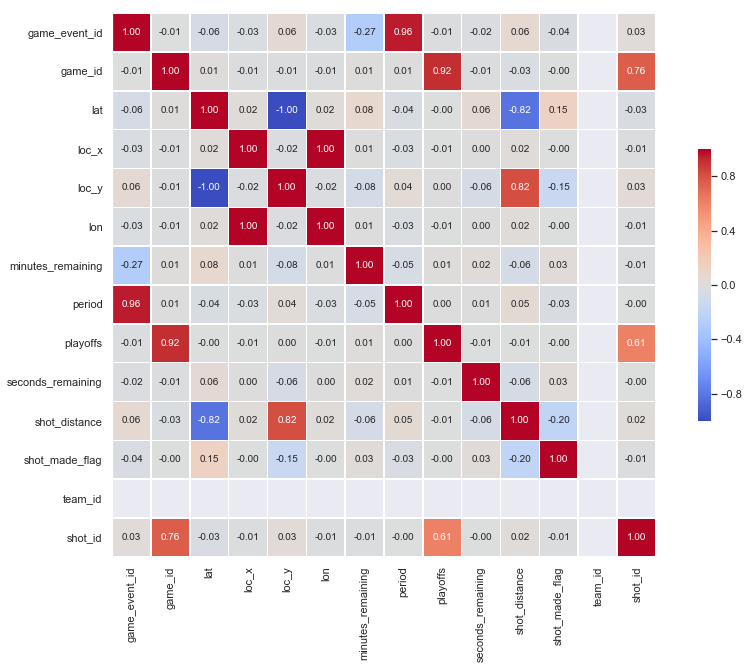

In [57]:
corr = train_df.corr()
g = sns.heatmap(corr,  vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(15,10)
    
plt.show()